<a href="https://colab.research.google.com/github/CheloMacatangay/ACT2/blob/main/Copy_of_Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>ACTIVITY 2</h1>
<h2>Car Accident Data Analytics</h2>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

accident = pd.read_csv("datasets\\uk_accident_data.csv")

accident

In [ ]:
accident.value_counts()

Index          Accident_Severity  Accident Date  Latitude   Light_Conditions        District Area       Longitude  Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  Road_Type           Urban_or_Rural_Area  Weather_Conditions     Vehicle_Type         
2.01E+12       Slight             12/02/2021     51.067126  Darkness - no lighting  Sedgemoor           -3.023829  1                     1                   Dry                      Dual carriageway    Rural                Fine no high winds     Car                      2
                                  22/11/2020     52.624184  Darkness - no lighting  Broadland            1.372570  1                     2                   Snow                     Dual carriageway    Rural                Snowing no high winds  Car                      2
                                  31/10/2020     55.003273  Darkness - no lighting  North Tyneside      -1.490457  1                     2                   Wet or damp              Dual

In [ ]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [ ]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [ ]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [ ]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [ ]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [ ]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [ ]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [ ]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h2>Univariate Analysis on accident that happened in 2019</h2>

In [ ]:
df_2019 = accident[accident['Year'] == 2019]

In [ ]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h2>ACTIVITY 2</h2>

<H3>Q1. Which Accident Severity occurs most frequently?</H3>

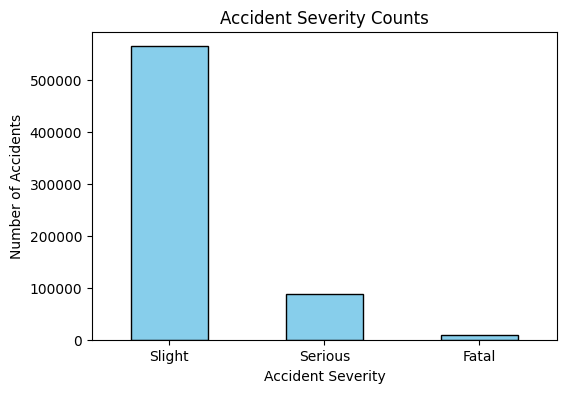

In [ ]:
import matplotlib.pyplot as plt

severity_counts = accident['Accident_Severity'].value_counts()

plt.figure(figsize=(6,4))
severity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Accident Severity Counts")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<h3> Q1. INSIGHT 1
Based on the graph, most accidents are slight. The majority of accidents recorded are classified as slight, with over 500,000 cases, making it the most common severity
Meanwhile, fatal accidents are the rarest type, with only a very small number recorded compared to both slight and serious cases.
</h3>h3>h3>

<h3>Q1. INSIGHT 2
There’s a huge gap between slight accidents and both serious and fatal ones, showing that the majority of accidents are not life-threatening.
</h3>

<h3>Q2. Number of Vehicles Involved under Different Weather Conditions</h3>

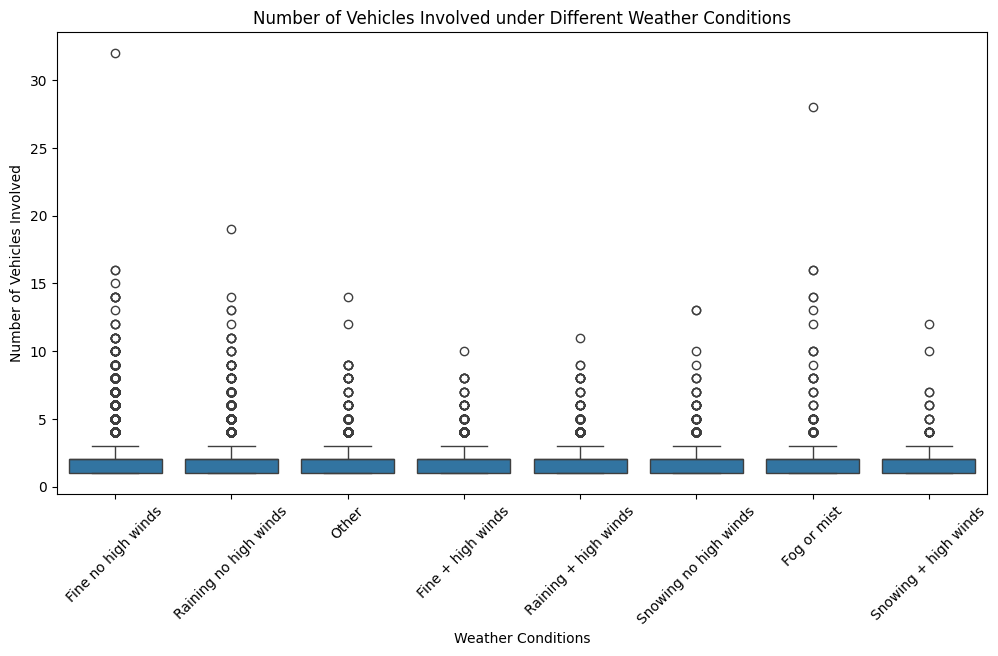

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    data=accident,
    x="Weather_Conditions",
    y="Number_of_Vehicles"
)
plt.title("Number of Vehicles Involved under Different Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Vehicles Involved")
plt.xticks(rotation=45)
plt.show()


<h3>Q2 . INSIGHT 1
Based on the plot shows that even in clear weather with no high winds, accidents can still involve more than 30 vehicles, which means very large accidents can happen even in good driving conditions.
</h3>

<h3>Q2. INSIGHT 2
Weather affects accidents differently , fog and rain can make them larger, but surprisingly, the biggest accidents still happen in clear weather.
</h3>

<h3>Q3. Road Surface Condition with the highest number of accidents?</h3>

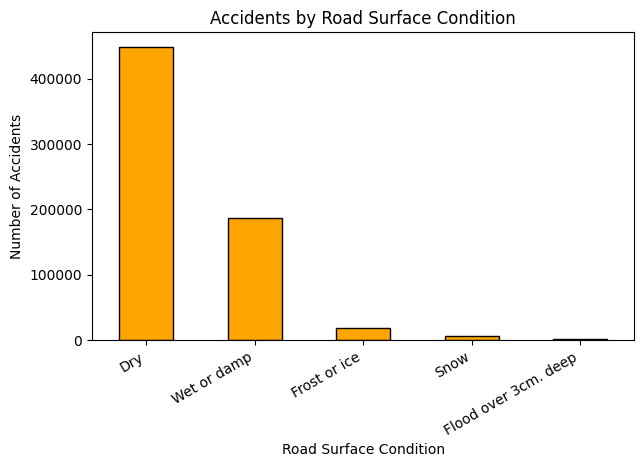

In [ ]:
import matplotlib.pyplot as plt


road_surface_counts = accident['Road_Surface_Conditions'].value_counts()


plt.figure(figsize=(7,4))
road_surface_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha='right')


plt.bar(road_surface_counts, height= 5, color='red')

plt.show()


<h3>Q3. INSIGHT 1
Most accidents happen on dry roads: Over 400,000 accidents occurred on dry surfaces, making it by far the most common condition for accidents, mainly because dry roads are the most common driving condition.
</h3>

<h3>Q3. INSIGHTS 2
Also based on it, Frost, ice, and snow cause fewer accidents overall. These conditions have much lower accident counts, likely because drivers avoid travel or drive more cautiously during extreme weather.
</h3>

<h3>Q4.In 2022, how many accidents happened, and what were the counts by Road Type?</h3>

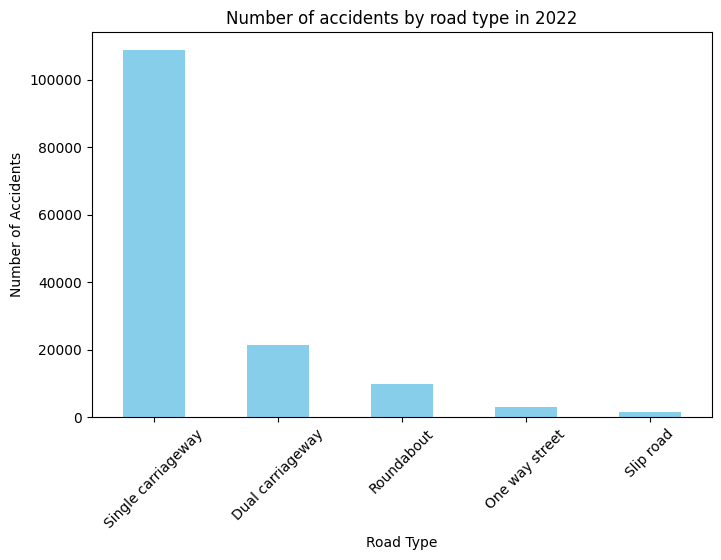

In [ ]:
import matplotlib.pyplot as plt

df_2022 = accident[accident['Year'] == 2022]

road_counts = df_2022['Road_Type'].value_counts()
road_counts.plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title('Number of accidents by road type in 2022')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h3>Q4. INSIGHT 1
In 2022, accidents were highest on single carriageways, followed by dual carriageways and roundabouts, while one-way streets and slip roads recorded the fewest, showing that road design and traffic flow affect accident levels.
</h3>

<h3>Q4. INSIGHT 2
One-way streets and slip roads had the fewest accidents since traffic flows in one direction and vehicles usually travel at lower speeds, making them safer.
</h3>

<h3>Q5. Which month had the highest average casualties?</h3>

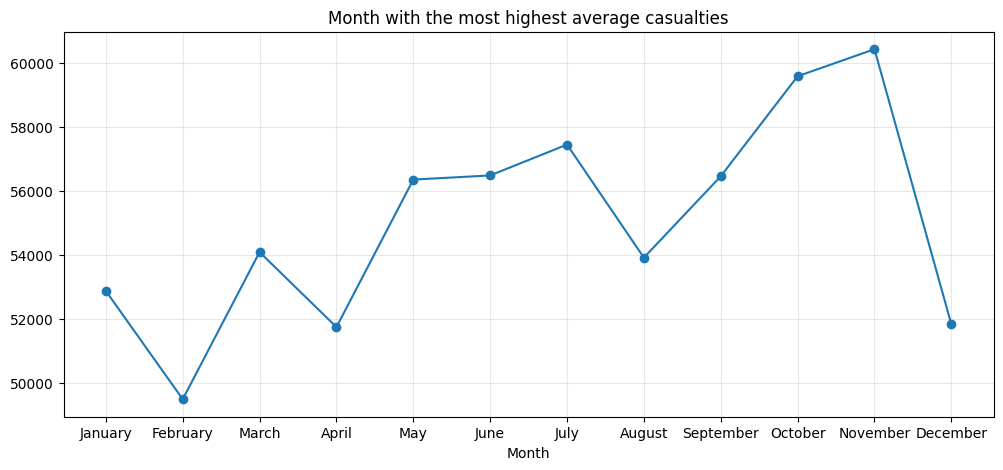

In [ ]:
import matplotlib.pyplot as plt
monthly_cas = accident.groupby('Month')['Number_of_Casualties'].count()

monthly_cas.plot(
    marker = 'o',
    figsize =(12,5),
    title = 'Month with the most highest average casualties'
)
plt.xticks(range(1,13), ['January','February','March','April','May', 'June','July','August','September','October','November','December'])
plt.grid(alpha=0.3)
plt.show()

<h3>
Q5. INSIGHT 1
Based on the graph as we can see, month of November has the highest casualties: With over 60,000, November records the peak in average casualties.
</h3>

<h3>Q5. INSIGHT 2
Based on the graph, it shows that the numbers are not the same each month, but there is a sudden increase in November and a sharp drop in December.
</h3>

<h3>Q6. Average number of vehicles involved per Vehicle Type.</h3>

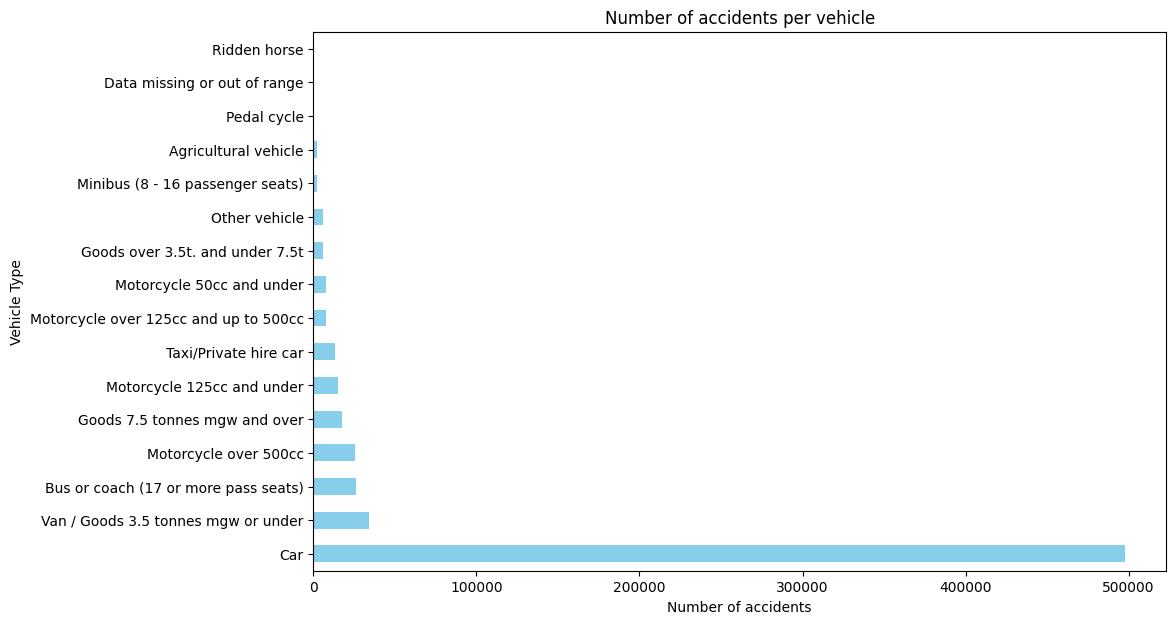

In [ ]:
import matplotlib.pyplot as plt

counts_vehicles = accident['Vehicle_Type'].value_counts()
counts_vehicles.plot(kind='barh',figsize=(11,7), color='skyblue')
plt.title("Number of accidents per vehicle")
plt.xlabel("Number of accidents")
plt.ylabel("Vehicle Type")
plt.show()

<h3>
Q6. INSIGHT 1
Based on the graph, cars have the most accidents, while all other vehicle types show much fewer.
</h3>

<h3>Q6. INSIGHT 2
Public transport vehicles (buses and taxis) have fewer accidents: Despite carrying many passengers, accidents involving these vehicles are relatively low.
</h3>

<h3>Q7. Number of casualties per year</h3>

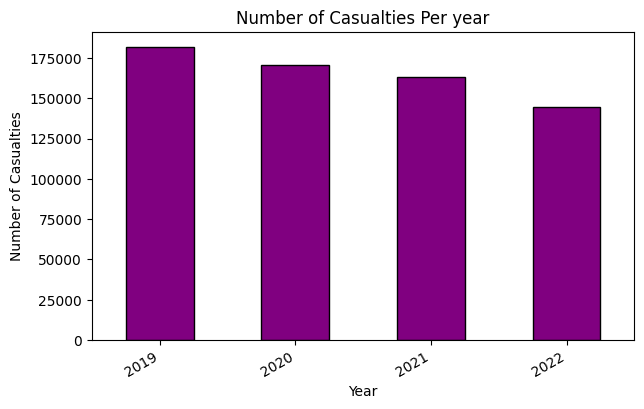

In [ ]:
import matplotlib.pyplot as plt


casualties_per_year = accident['Year'].value_counts().sort_index()

plt.figure(figsize=(7,4))
casualties_per_year.plot(kind='bar', color='purple', edgecolor='black')

plt.title("Number of Casualties Per year")
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=30, ha='right')

highest_year = casualties_per_year.idxmax()
highest_count = casualties_per_year.max()
plt.bar(highest_year, highest_count)

plt.show()


<h3>Q7. INSIGHT 1
Based on the graph shows, casualties are decreasing over time l. From year  2019 to 2022, the number of casualties dropped consistently, from over 180,000 in 2019 to below 150,000 in 2022.
</h3>

<h3>Q7. INSIGHT 2
2019 recorded the highest casualties, while 2022 had the lowest. This shows a positive outcome compared to previous years, possibly due to improved safety campaigns or changes in driving behavior.
</h3>

<h3>Q8.What are the road surface conditions per year?</h3>

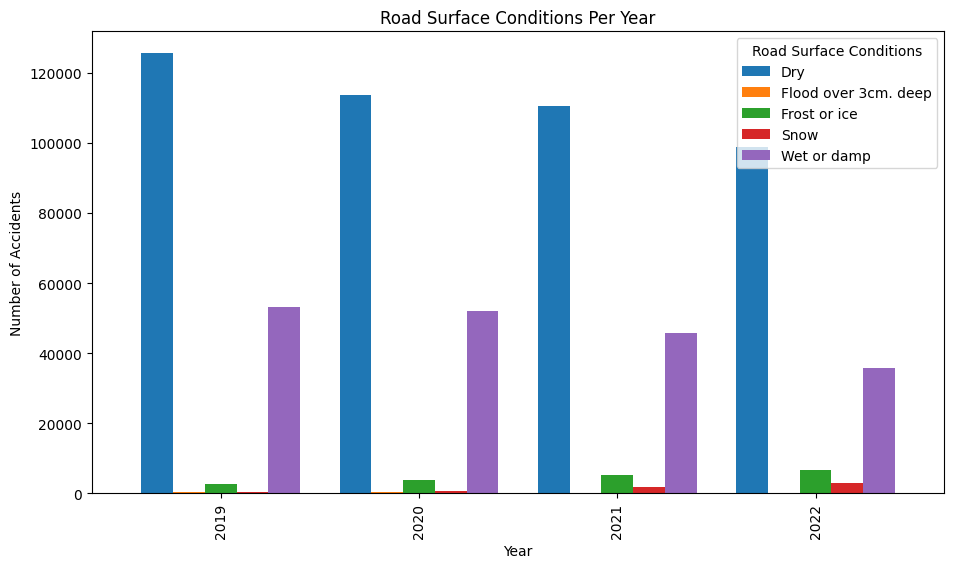

In [ ]:
data = accident.groupby(['Year','Road_Surface_Conditions']).size().unstack()

data.plot(
    kind ='bar',
    figsize =(11,6),
    width=0.8
)
plt.title('Road Surface Conditions Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Road Surface Conditions')
plt.show()

<h3>Q8. INSIGHT 1
In 2019, accidents on dry and wet roads were at their highest, but by 2022 both had decreased noticeably. However, accidents on icy, snowy, and flooded roads slightly increased in 2022, showing that while common surfaces became safer, extreme conditions grew riskier.
</h3>

<h3>Q8. INSIGHT 2.
Dry surfaces lead to most accidents every year.  Even though dry roads seem safe, they consistently record the highest number of accidents
</h3>

<h3>Q9. Do more accidents happen in urban or rural areas?<h3>

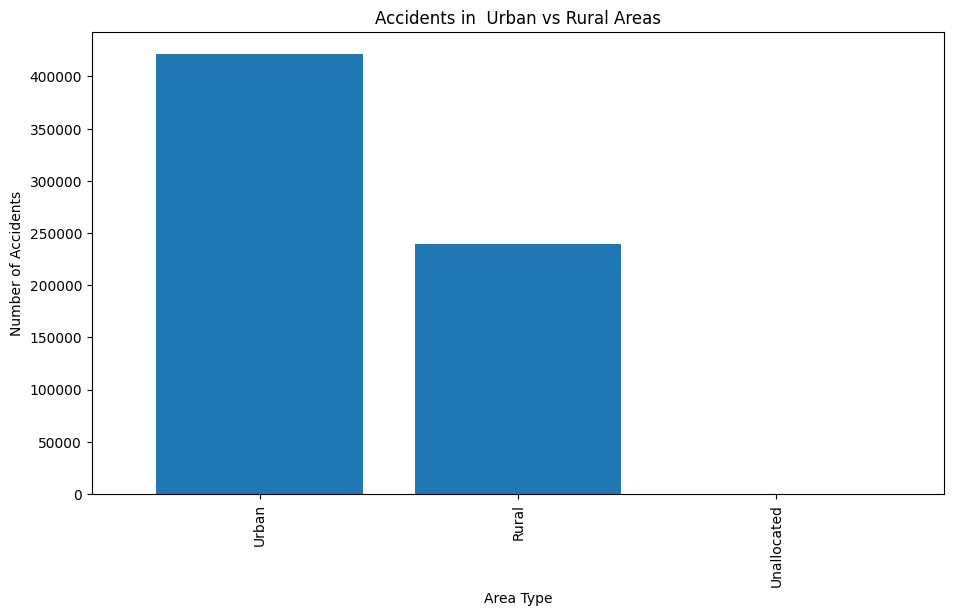

In [ ]:
Area_counts = accident ['Urban_or_Rural_Area'].value_counts()

Area_counts .plot(
    kind ='bar',
    figsize =(11,6),
    width=0.8
)
plt.title('Accidents in  Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.show()

<h3>Q9. INSIGHT 1
Most accidents occur in urban areas, likely due to heavier traffic, while rural areas record fewer accidents but may involve higher speeds.
</h3>

<h3>Q10.How do accidents vary across light conditions?</h3>



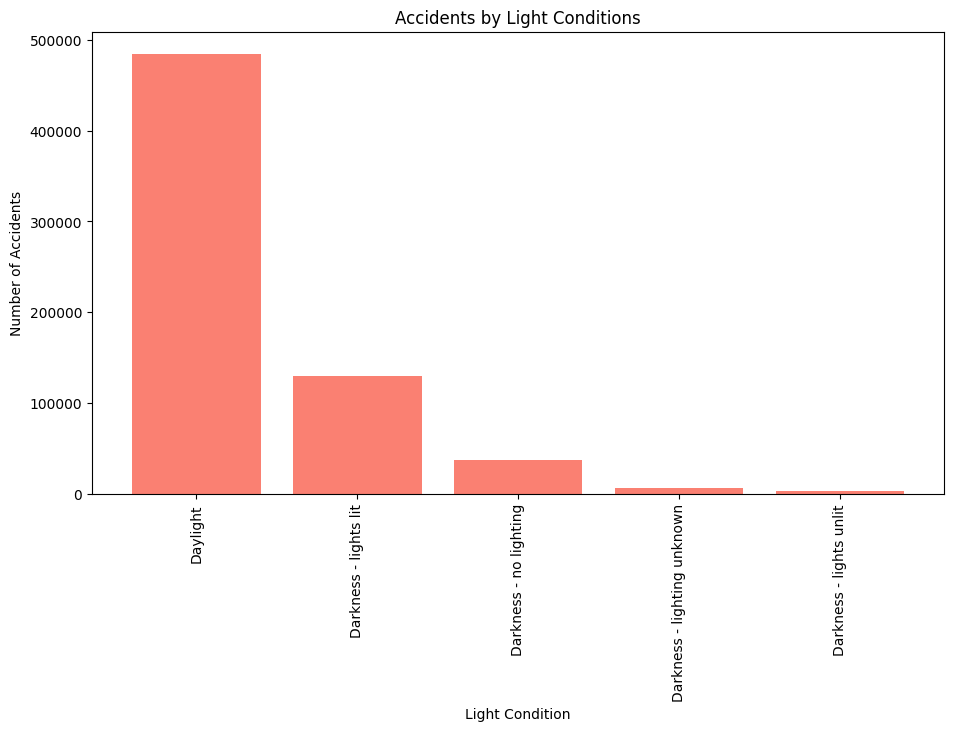

In [ ]:
Light_counts = accident ['Light_Conditions'].value_counts()


Light_counts .plot(
    kind ='bar',
    figsize =(11,6),
    width=0.8,
    color='salmon'
)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.show()


<h3>Q10. INSIGHT 1
Most accidents happen in daylight simply because more vehicles are on the road, while accidents in darkness are fewer but often more severe.
</h3>

<h3>Q11. What  day of week has highest Fatal Accident?<h3/>

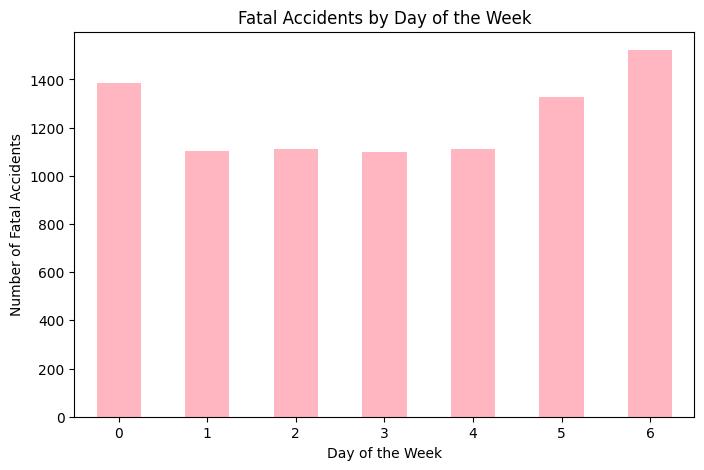

In [ ]:
fatal_accidents = accident [accident ['Accident_Severity'] == 'Fatal']

day_counts = fatal_accidents['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(8,5))
day_counts.plot(kind='bar', color='Lightpink')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Day of the Week')
plt.xticks(rotation=0)
plt.show()

<h3> INSIGHT - Fatal accidents peak on weekends (highest on Sunday, Saturday close behind) and are lowest midweek (Monday–Thursday).  </h3>

<h3>
Q12. Which district area has the highest number of accidents?</h3>

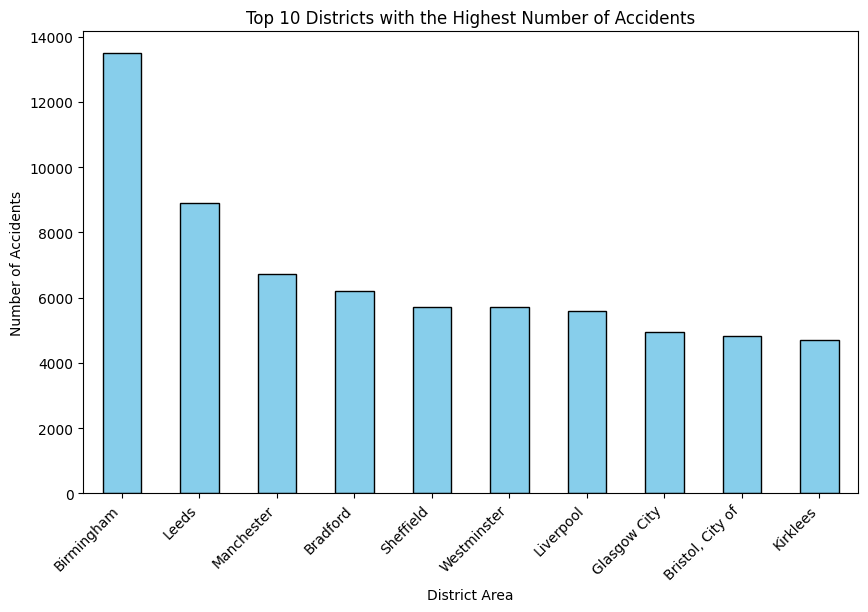

In [ ]:
district_counts = accident['District Area'].value_counts().head(10)

plt.figure(figsize=(10,6))
district_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Districts with the Highest Number of Accidents")
plt.xlabel("District Area")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>INSIGHT - Birmingham leads in accidents, followed by Leeds and Manchester, while other districts show steadily fewer cases, highlighting higher risks in major urban centers. </h3>

<h3>Q13. Which vehicle types are most likely to be involved in accidents during rainy weather?
</h3>

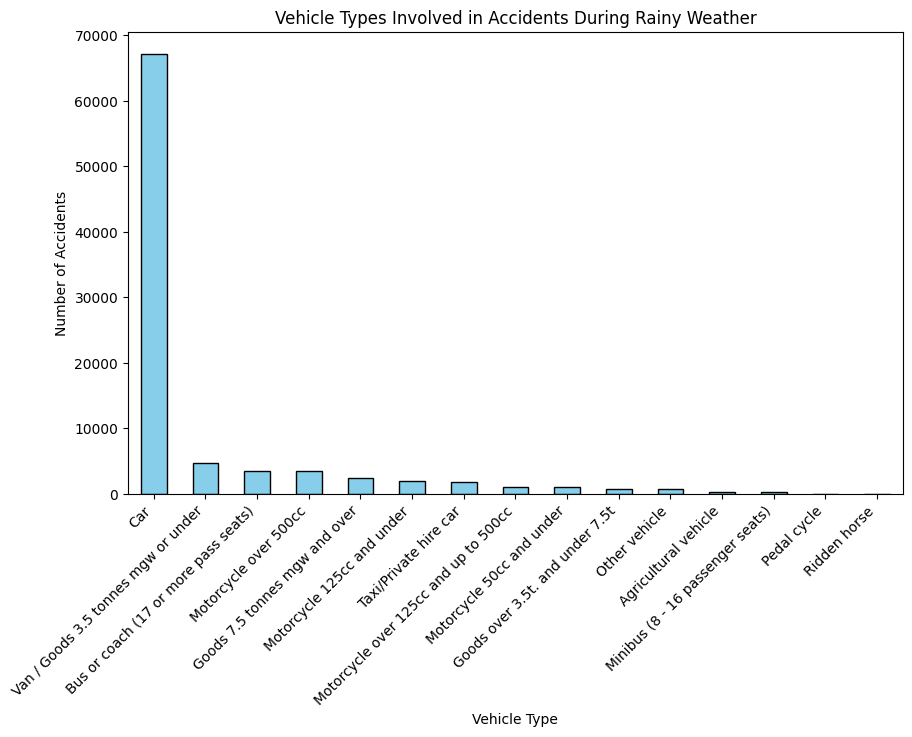

In [ ]:
rainy_weather = accident [accident ['Weather_Conditions'].str.contains("Rain", case=False, na=False)]

vehicle_counts_rain = rainy_weather['Vehicle_Type'].value_counts()

plt.figure(figsize=(10,6))
vehicle_counts_rain.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Vehicle Types Involved in Accidents During Rainy Weather")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>INSIGHT- Cars account for the vast majority of accidents during rainy weather, far outnumbering all other vehicle types, with vans, buses, and motorcycles contributing much smaller shares. </h3>

<h3>Q14. Which months consistently show higher accidents across multiple years?</h3>


<Figure size 1200x600 with 0 Axes>

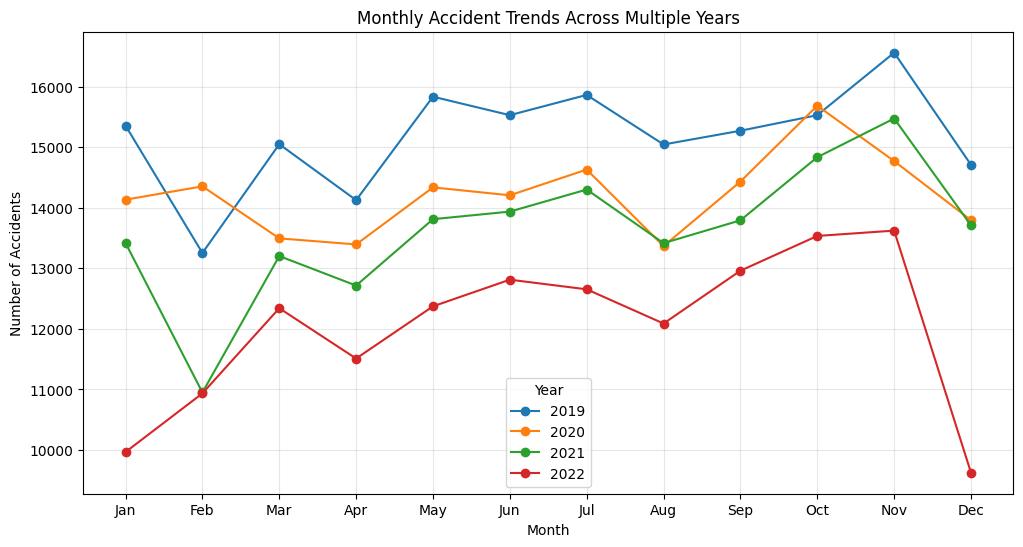

In [ ]:
monthly_counts = accident.groupby(['Year', 'Month']).size().unstack()


plt.figure(figsize=(12,6))
monthly_counts.T.plot(kind='line', marker='o', figsize=(12,6))

plt.title("Monthly Accident Trends Across Multiple Years")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(
    ticks=range(1,13),
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
)
plt.grid(alpha=0.3)
plt.legend(title="Year")
plt.show()

<h3>INSIGHT - 2019 had the highest accident counts, 2020–2021 showed mid-level trends, while 2022 had the lowest accidents with a sharp drop in December. </h3>

<h3>Q15. Which vehicle types are most frequently involved in fatal accidents?</h3>

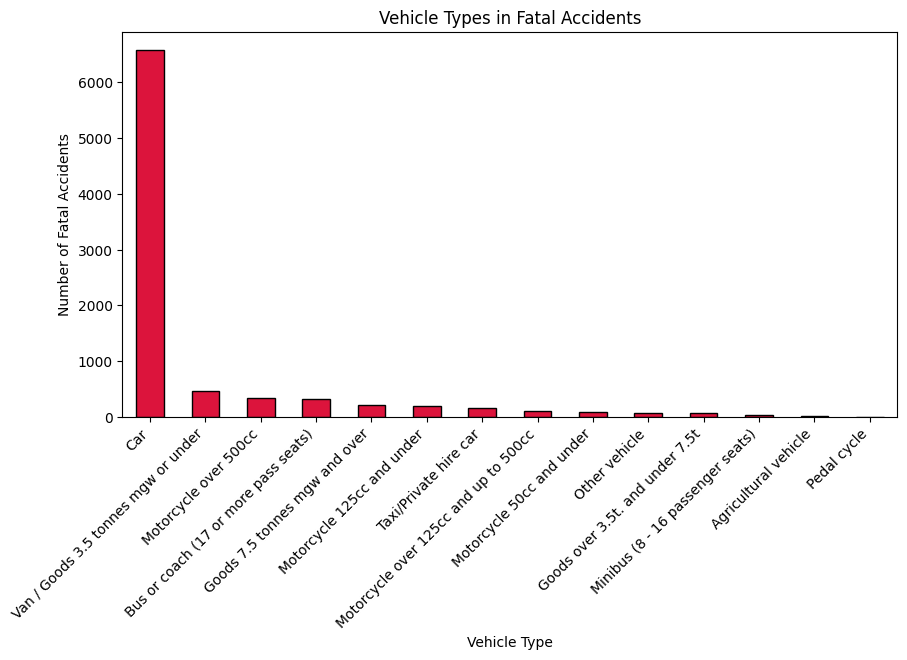

In [ ]:
fatal_vehicles = accident[accident["Accident_Severity"]=="Fatal"]["Vehicle_Type"].value_counts()

plt.figure(figsize=(10,5))
fatal_vehicles.plot(kind="bar", color="crimson", edgecolor="black")
plt.title("Vehicle Types in Fatal Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<h3>INSIGHT - Cars account for the vast majority of fatal accidents, while vans, motorcycles, and buses contribute smaller shares, and other vehicle types have minimal involvement. </h3>

<h3>Q16. How has the number of accidents changed over the years?</h3>

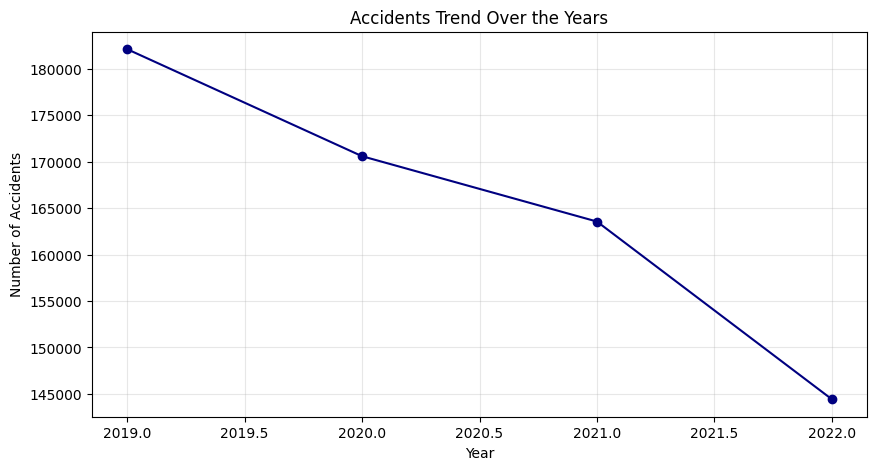

In [ ]:
yearly_accidents = accident.groupby("Year").size()

plt.figure(figsize=(10,5))
yearly_accidents.plot(kind="line", marker="o", color="navy")
plt.title("Accidents Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True, alpha=0.3)
plt.show()

<h3>INSIGHT - Accidents have steadily declined from 2019 to 2022, with the sharpest drop between 2021 and 2022. </h3>

<h3>Q17. How do accident severities differ between daytime and nighttime under different light conditions?</h3>

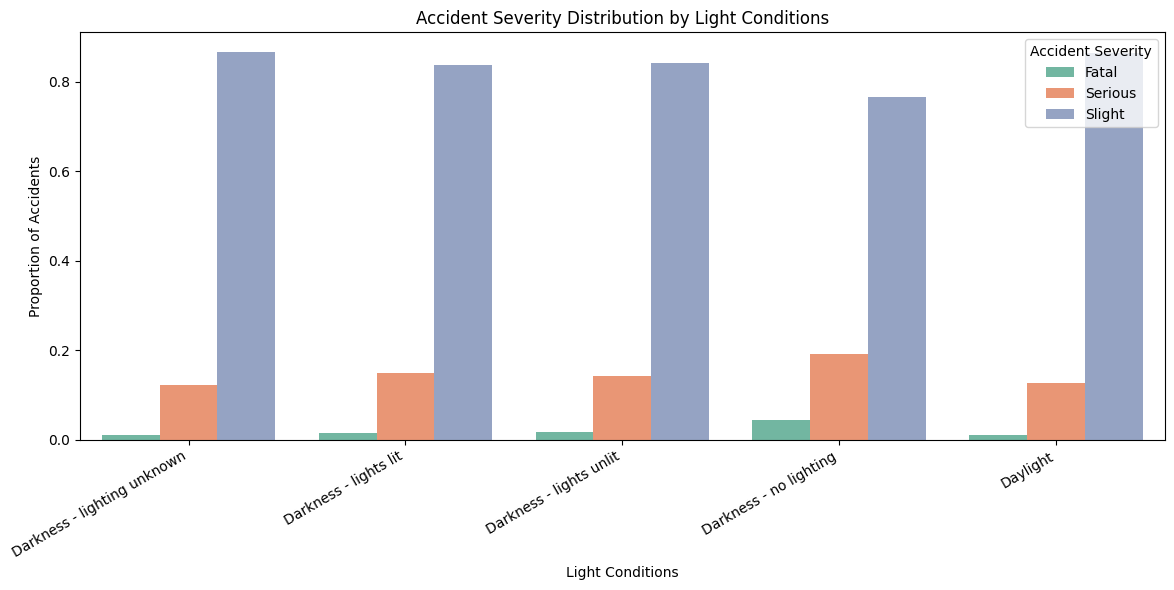

In [ ]:
light_severity= accident.groupby(["Light_Conditions", "Accident_Severity"]).size().reset_index(name="Count")


totals = accident.groupby("Light_Conditions").size().reset_index(name="Total")


light_severity = light_severity.merge(totals, on="Light_Conditions")


light_severity["Proportion"] = light_severity["Count"] / light_severity["Total"]


plt.figure(figsize=(12,6))
sns.barplot(
    data=light_severity,
    x="Light_Conditions",
    y="Proportion",
    hue="Accident_Severity",
    palette="Set2"
)

plt.title("Accident Severity Distribution by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Proportion of Accidents")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

<h3>INSIGHT - Most accidents are slight across all light conditions. However, serious and fatal accidents are more common in darkness without lighting, highlighting higher risks in poorly lit areas.</h3>